# Facebook营销组合分类预测
## 背景信息
在Facebook注册用户超过20亿人，每天会产生超过百亿条的消息、近10亿张新图片，借助大数据技术，Facebook可以跟踪用户网络行为、进行面部识别和标注、分析用户喜好等等，从而向广告客户的市场营销人员展示受众对于品牌、事件、活动和主题的反应。Facebook实际上已经成为一家大数据驱动的广告公司。为了展示其收集和挖掘大数据的能力，Facebook找伦敦创意机构Human After All设计了一副【市场洞察扑克牌】，每张牌都图文并茂地提供了一条关于用户的数据洞察信息，例如：  
* 41%的英国人在11月就开始圣诞节采购
* 已婚人士比单身更喜欢讨论食物（31% vs 24%）
* 63%谈论奢侈品话题的用户年龄在18-34岁之间
* 61%的英国Facebook用户提前一周就开始为情人节做准备
* 刚刚有宝宝的父母们花在手机上的时间是没有宝宝的用户的 1.6 倍
* 母亲节那天，关于母亲节的讨论多达 9430 万次

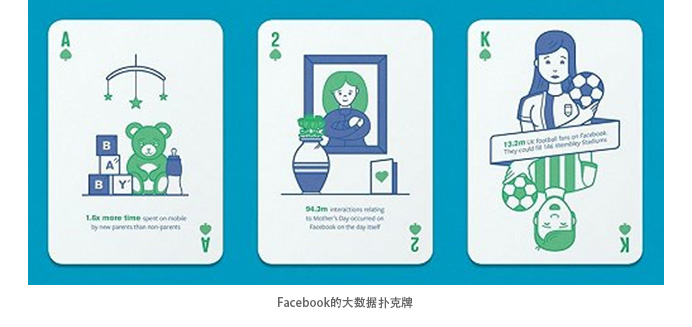

## 任务说明
假设你是Facebook的大数据科学家，你的职责是为某个目标客户群，提供一组【市场洞察扑克牌】组合，为其提供市场营销策略指导，在帮助客户成功的同时也为Facebook获得广告收入。  
基础规则是：你只能给客户5张牌。客户基于这5条不同的市场洞察信息制定市场营销策略，因此5张牌的不同组合方案，会产生截然不同的经济效果，也为Facebook带来不一样的收入。  
52张牌对应52条市场洞察信息，会产生过百万的组合方式，你需要通过大数据技术，找出不同组合方案所对应的效果，并分出“市场洞察信息组合优化等级”，Facebook广告销售人员就可以根据这个优化等级表开展销售工作。  
经Facebook允许，你做了一次小规模内测，通过内测你收到了25000条的反馈数据，根据客户反馈回来的收益，你对每条数据进行了0~9的组合优化等级标注。
接下去，你需要设计算法，根据上述 25000条内测数据及其优化等级标注，找出内在规律，为剩余100万条随机组合方案进行优化等级标注。  


## 数据集描述
训练数据集包括11个字段，字段的含义如下所示，牌面花色用C,D,H,S表示，分表代表梅花、方块、红桃和黑桃，牌面大小用1-10以及J、Q、K来表示。需要注意，字段11是每条数据的优化等级标注。
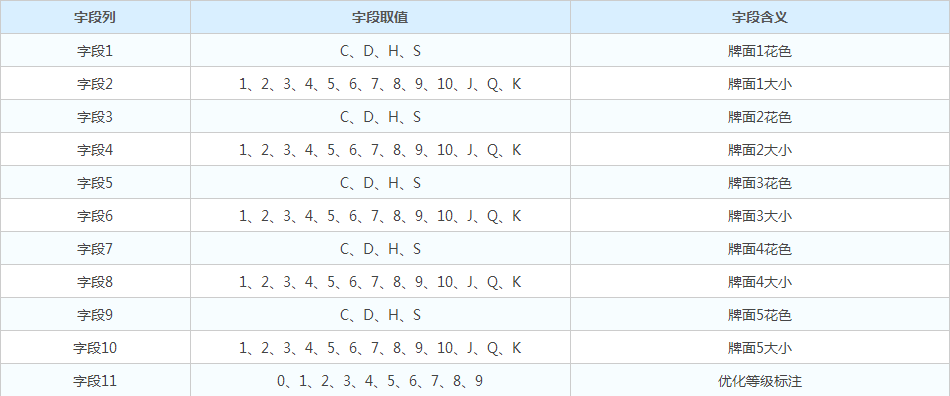

## 加载数据集

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"data.csv", header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10
5702,S,2,H,6,S,Q,H,4,D,2,3
12015,C,10,H,9,S,10,H,7,D,9,2
12791,H,5,H,4,D,1,D,2,S,Q,0
21018,S,8,C,3,D,1,D,10,D,6,0
18295,S,7,H,4,C,K,D,6,C,Q,0
988,C,1,H,8,C,9,D,K,S,1,3
11907,S,7,D,J,S,Q,H,K,S,3,0
5064,H,3,D,9,H,J,C,8,H,Q,0
17440,S,10,H,6,D,8,D,5,H,7,0
5491,H,8,S,5,H,K,S,J,H,1,0


## 数据预处理
### 数据清洗
* 缺失值
* 异常值
* 重复值

In [ ]:
# data.info()
# data.describe()
# print(data.duplicated().sum())
# 可以在删除之前先查看哪些数据出现重复。
# data[data.duplicated(keep=False)]
# data.drop_duplicates(inplace=True)
# len(data)

### 数据转换
将数据转换为数值类型与需要的格式。

In [9]:
from sklearn.model_selection import train_test_split
# 分离数据集，取出X（样本）与y（标签）。
X, y = data.iloc[:, :-1], data.iloc[:, -1]
# 因为扑克牌的花色与面值仅仅是区分不同的营销组合方案而已，没有大小与顺序之分，
# 因此，我们应该使用one-hot编码进行转换。
X = pd.get_dummies(X)
# display(X)
pd.set_option("max_columns", 100)
X.head(2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

,0_C,0_D,0_H,0_S,1_1,1_10,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_J,1_K,1_Q,2_C,2_D,2_H,2_S,3_1,3_10,3_2,3_3,3_4,3_5,3_6,3_7,3_8,3_9,3_J,3_K,3_Q,4_C,4_D,4_H,4_S,5_1,5_10,5_2,5_3,5_4,5_5,5_6,5_7,5_8,5_9,5_J,5_K,5_Q,6_C,6_D,6_H,6_S,7_1,7_10,7_2,7_3,7_4,7_5,7_6,7_7,7_8,7_9,7_J,7_K,7_Q,8_C,8_D,8_H,8_S,9_1,9_10,9_2,9_3,9_4,9_5,9_6,9_7,9_8,9_9,9_J,9_K,9_Q
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.value_counts()

## 建模与预测

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression()
# solver参数决定了我们对逻辑回归损失函数的优化方法
# lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数
# lr = LogisticRegression(solver="lbfgs", multi_class="multinomial")
# 当样本不均衡时，我们可以考虑去设置（调整）样本的权重，进而达到平衡效果。
# class_weight 用来设置样本类别的权重。   值：balanced 表示根据样本类别的数量
# 进行设置权重，样本类别的数量越多，权重越低，样本类别的数量越少，权重越高。
# 我们也可以自行设置class_weight每个类别的权重。我们可以指定一个权重字典，
# 字典的key指定类别标签，
# 字典的value指定权重。{0: 5, 1: 3}
# lr = LogisticRegression(class_weight="balanced")
# lr = LogisticRegression(solver="lbfgs", multi_class="multinomial", class_weight="balanced")


lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

In [ ]:
# 从运行结果可知，正确率在50%左右，单从10分类来说，可能效果不是那么差。

# 样本不均衡问题：
# 当样本分布不均衡时（不同类别的样本数量差异很大时），如果使用这样的数据集进行建模，
# 则很可能建立的模型 ,会清一色的预测样本数量最多的那个类别。
y_hat = lr.predict(X_test)
display(pd.Series(y_hat).value_counts())
display(pd.Series(y_test).value_counts())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight="balanced")
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_features=None)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

In [ ]:
y_hat = rf.predict(X_test)
display(pd.Series(y_hat).value_counts())
display(pd.Series(y_test).value_counts())

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.grid_search import GridSearchCV

# sklearn提供的网格搜索交叉验证类，可以帮助我们自动去寻找令模型效果最好的超参数组合。
from sklearn.model_selection import GridSearchCV

bagging = BaggingClassifier(n_jobs=-1)

# param_grid（所有可能的超参数组合）格式：
# 格式可以有两种：
# 1 一个字典类型：字典的key用来指定模型中的超参数。字典的vlaue用来指定该超参数的选取范围。
# 2 列表类型，列表中的每个元素是一个字典类型，字典类型就是格式1指定的类型。

# 格式1
# param_grid = {"base_estimator": [DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=3)],
#         "n_estimators": [100, 200, 300],
#         "max_samples": [0.5, 0.75, 1.0],
#         "max_features": [0.5, 0.75, 1.0]}
# 格式2
param_grid = [{"base_estimator": [DecisionTreeClassifier()], 
        "n_estimators": [100, 300],
        "max_samples": [0.75, 1.0],
        "max_features": [0.5]}]

# 格式1会进行笛卡尔积式的所有组合。当我们不想尝试任意可能的组合时（只想尝试部分超参数取值的组合），
# 我们就可以使用格式2。

# estimator 指定为哪一个模型对象来调整参数数。（选择最优的超参数组合。）
# param_grid 指定可能的超参数组合。
# cv (cross validation) 进行参数指定折数的交叉验证。
# scoring 指定交叉验证的评估标准。accuracy 指定使用正确率。

gs = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=3, scoring="accuracy")
gs.fit(X_train, y_train)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
# 返回最好的超参数组合。
print(gs.best_params_)
# 返回在最好的超参数下，评估的结果值。
print(gs.best_score_)

In [ ]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=tree, 
        n_jobs=-1, n_estimators=300, max_features=1.0, max_samples=0.75)
bagging.fit(X_train, y_train)
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

In [ ]:
y_hat = bagging.predict(X_test)
display(pd.Series(y_hat).value_counts())
display(pd.Series(y_test).value_counts())

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100)
ada.fit(X_train, y_train)
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
y_hat = ada.predict(X_test)
display(pd.Series(y_hat).value_counts())
display(pd.Series(y_test).value_counts())

## 深度学习实现

In [3]:
import numpy as np
import pandas as pd
# tensorflow命名管理，习惯上重命名为tf。
import tensorflow as tf
# 将文本类别转换成数值类别。
from sklearn.preprocessing import LabelEncoder
# sklearn中提供的one-hot encoder的转换类，可以将特征转换为one-hot编码的形式。
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
def load_data(path):
    data = pd.read_csv(path, header=None)
    X, y = data.iloc[:, :-1], data.iloc[:, -1]
#     display(X.head(10))
    # 如果对于不同的列A与B，A与B中不重复的值是相同的，则使用LabelEncoder对A与B进行转换之后，
    # 相同的值，映射之后的值也一定是相同的。转换规则：对A，B列中不重复的值进行排序，然后进行映射。
    lb = LabelEncoder()
    X = X.apply(lambda col: lb.fit_transform(col))
#     display(X.head(10))
    ohe = OneHotEncoder()
#     ohe = OneHotEncoder(sparse=False)
    # OneHotEncoder默认情况下，会返回稀疏矩阵类型。如果需要返回ndarray数组的类型，可以使用
    # toarray方法进行转换。我们也可以指定OneHotEncoder的sparse参数，将其设置为False，这样，
    # transform方法就不会再返回稀疏矩阵，而是返回ndarray数组。
#     display(ohe.fit_transform(X).toarray())
#     display(ohe.fit_transform(X))
    X = pd.DataFrame(ohe.fit_transform(X).toarray())
    # 
#     display(X.head())
    # DataFrame列索引默认是从0开始，增量为1，是数值类型的。数值类型不是合法的标示符。而这些列
    # 稍后要作为tensorflow的特征列而进行训练，在tensorflow中，列名要求是合法的标示符，因此，我们
    # 需要将当前列名转换成合法的标示符。
    X.columns = X.columns.map(lambda x: f"c{x}")
#     display(X.head())
    return X, y

load_data("data.csv")

In [ ]:
# train_X.shape
for k in train_X.keys()

In [4]:
def load_data(path):
    """加载数据集，并对数据集进行处理。
    
    Parameters
    -----
    path : str
        数据集的路径。
        
    Returns
    -----
    (X, y) : tuple
        特征矩阵X与对应的标签y。
    """
    
    data = pd.read_csv(path, header=None)
    X, y = data.iloc[:, :-1], data.iloc[:, -1]
    lb = LabelEncoder()
    X = X.apply(lambda col: lb.fit_transform(col))
    ohe = OneHotEncoder()
    X = pd.DataFrame(ohe.fit_transform(X).toarray())
    X.columns = X.columns.map(lambda x: f"c{x}")
    return X, y

def train_input_fn(features, labels):
    """定义训练函数，用于训练使用。
    
    Parameters
    -----
    features : 类数组类型。 形状：[样本数量， 特征数量]
        用于训练的特征矩阵。
    labels : 类数组类型。形状为：[样本数量]
        每个样本对应的标签。（分类）
        
    Returns
    -----
    dataset : tf.data.Dataset
        数据集。
    """
    
    # 使用DataSet的类方法创建DataSet（Tensorflow中的数据集对象。）
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # shuffle 对数据集进行洗牌。
    # repeat 重复数据集参数指定的次数（n epoch）
    # batch  每个批次样本的数量。
    dataset = dataset.shuffle(10000, seed=0).repeat(15).batch(50)
    return dataset

def eval_input_fn(features, labels=None):
    """定义评估函数，用于评估或预测。
    
    Parameters
    -----
    features : 类数组类型。 形状：[样本数量， 特征数量]
        用于测试的特征矩阵。
    labels : 类数组类型。形状为：[样本数量]
        每个样本对应的标签。（分类）
        
    Returns
    -----
    dataset : tf.data.Dataset
        数据集。
    """

    features = dict(features)
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    dataset = dataset.batch(100)
    return dataset

X, y = load_data(r"data.csv")
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

# 定义列表，用来存放tensorflow的特征列。
my_feature_columns = []

# train_X.keys() 会返回Dataframe对象的列索引。
for key in train_X.keys():
    # 创建tensorflow的特征列对象（数值类型），通过key参数来指定特征列的名字。
    # 然后使用之前创建的列表加入tensorflow的特征列。
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
    

# 创建配置信息对象。
config = tf.estimator.RunConfig(
    # 设置模型保存的路径。每次程序运行都是一个新的路径，目的就是为了让每次程序可以从全新的状态去运行。
    # 如果设置相同的路径，则会从该路径下去寻找上一次保存的检查点，从而继续进行训练。
    model_dir=f"temp_check_point/{datetime.strftime(datetime.now(), '%Y%m%d-%H%M%S')}",
    # 保存检查点的时间间隔。
    save_checkpoints_secs = 100 * 3600,
    # 最多保存检查点的数量。
    keep_checkpoint_max = 3
)
# DNNClassifier 在程序开始执行与程序执行结束一定会保存检查点，无论config如何进行设置。

# 参数：
# feature_columns  设置特征列。
# hidden_units 指定隐藏层的数量以及每个隐藏层具有的神经元数量。
# 指定一个一维数组，数组中元素的个数就是隐藏层的数量，数组中每个元素的值就是每个隐藏层神经元的数量。
# config  运行时的一些配置信息。
# n_classes  分类的数量（输出层神经元的数量）
# optimizer  指定优化器。算法：梯度下降。

classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns, hidden_units=[512] * 2, 
                config=config, n_classes=10, optimizer="SGD")
# 训练DNNClassifier。参数指定一个函数，该函数能够返回一个数据集对象，用于训练。
classifier.train(input_fn=lambda : train_input_fn(train_X, train_y))
# 评估DNNClassifier。参数指定一个函数，使用该函数返回的数据集评估当前的模型。
classifier.evaluate(input_fn=lambda : eval_input_fn(test_X, test_y))

INFO:tensorflow:Using config: {'_model_dir': 'temp_check_point/20190330-202713', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 360000, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 3, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027D03E33E48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into temp_check_point/20190330-202713\model.ckpt.
INFO:tensorflow:loss = 114.66054, step = 1
INFO:tensorflow:global_step/sec: 63.3801
INFO:tensorflow:loss = 65.98199, step = 101 (1.576 sec)
INFO:tensorflow:global_step/sec: 83.6957
INFO:tensorflow:loss = 54.663612, step = 201 (1.194 sec)
INFO:tensorflow:global_step/sec: 83.2094
INFO:tensorflow:loss = 48.74087, step = 301 (1.203 sec)
INFO:tensorflow:global_step/sec: 82.5246
INFO:tensorflow:loss = 51.16407, step = 401 (1.211 sec)
INFO:tensorflow:global_step/sec: 81.3198
INFO:tensorflow:loss = 52.211998, step = 501 (1.231 sec)
INFO:tensorflow:global_step/sec: 81.1225
INFO:tensorflow:loss = 45.271877, step = 601 (1.233 s

{'accuracy': 0.95778024,
 'average_loss': 0.16033965,
 'loss': 15.914347,
 'global_step': 5628}

In [ ]:
# 进行预测。
y_hat = classifier.predict(input_fn=lambda : eval_input_fn(test_X))
print(y_hat)

In [ ]:
result = next(y_hat)
result

In [ ]:
np.exp(result["logits"]) / np.sum(np.exp(result["logits"]))

# 样本不均衡
当样本不均衡时，模型的训练就会受到一定的限制，可能会导致不管传递什么样本，模型一律预测为训练时样本类别最多的那一个。

# 解决方案
## 下（降）采样
将类别多的样本搜出一部分，与类别少的样本数量接近平衡。  
此种方式可能效果不是特别理想，因为我们会丢失类别多的样本中很大量的一部分。

## 上（升）采样
伪造类别少的样本，使得类别少的样本数量能够与类别多的样本数量接近平衡。  
通过SMOTE算法可以进行伪造样本。SMOTE算法基于KNN算法来进行计算。

In [ ]:
from imblearn.over_sampling import SMOTE

# k_k_neighbors 根据周围的n个邻居，来生成样本。
s = SMOTE(k_neighbors=4)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X = pd.get_dummies(X)
# 根据传递的数据集来平衡生成样本。
X2, y2 = s.fit_sample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
display(lr.score(X_train, y_train))
display(lr.score(X_test, y_test))

## 调整样本类别的权重
通过class_weight="balanced"。也可以通过字典来自定义权重。

## 通过集成学习
例如，使用Bagging组合不限制生长的决策树。

## 换模型
例如，今天的深度学习。